Self-supervised learning

In [ ]:
# ▷ 자기지도학습(Self-supervised learning)은 AI 모델이 레이블이 없는 데이터에서 학습할 수 있도록, 데이터를 스스로 생성한 레이블을 이용해 학습하는 방식입니다.
# ▷ 이 방식은 주로 비지도 학습(unsupervised learning)과 지도 학습(supervised learning)의 중간 형태로,
# 레이블이 없는 데이터에서 유용한 패턴을 찾아 특정 태스크를 수행하도록 학습됩니다.

# 주식 데이터로 다음 날 가격 예측 사례

In [ ]:
#  주식의 과거 가격 데이터를 이용해 다음 날의 가격을 예측하는 문제를 설정해보겠습니다.
#  이 경우, 레이블이 필요하지 않기 때문에, 과거 데이터를 이용해 학습 데이터와 정답을 생성하는 방식으로 self-supervised 학습이 가능합니다.

In [ ]:
# Self-Supervised Learning의 기본 개념 적용
# 여기에서는 단순히 과거 며칠 간의 주식 가격 데이터로 다음 날 가격을 예측하는 방식을 사용하여, 데이터에서 특정 패턴을 학습하게 합니다.
# 이 방식은 자연스럽게 주식 데이터를 통한 self-supervised learning을 구현할 수 있게 합니다.

In [ ]:
# 코드 설명
# 데이터 불러오기: yfinance 라이브러리를 사용해 삼성전자 일별 주가 데이터를 가져옵니다.

# '005930.KS'는 삼성전자의 한국 거래소(KRX) 티커입니다.
# 날짜 범위는 start와 end를 통해 설정할 수 있습니다.
# 데이터 정규화: MinMaxScaler를 사용해 주가 데이터를 0~1 사이로 정규화합니다.

# Self-supervised 학습 데이터 생성: 과거 5일간의 종가 데이터를 입력으로, 다음 날의 종가를 예측하는 방식으로 데이터셋을 구성합니다.

# LSTM 모델 정의: 시계열 데이터를 학습할 수 있는 LSTM 모델을 사용합니다.

# 모델 학습 및 예측: 학습을 통해 모델이 다음 날 종가를 예측하도록 하고, 결과를 시각화하여 실제 주가와 비교합니다.

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# 1. 삼성전자 주가 데이터 가져오기 (yfinance 사용)
ticker = '005930.KS'  # 삼성전자 티커 (코스피 상장)
data = yf.download(ticker, start="2020-01-01", end="2023-01-01", actions=False)
data = data[['Close']]  # 종가 데이터만 사용


# 2. 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])


In [ ]:
#  주가 데이터를 기반으로 self-supervised 학습을 위한 입력 데이터(X)와 출력 데이터(Y)를 생성하는 함수입니다.
#     과거 5일간의 종가 데이터를 입력(X)으로 사용하여, 다음 날의 종가(Y)를 예측하는 데이터셋을 만듭니다.

In [ ]:
## 함수 정의 및 인자
# def create_dataset(dataset, look_back=5):
# dataset: 정규화된 주가 데이터 (여기서는 scaled_data)로, 각 날짜의 종가를 포함하는 배열입니다.
# look_back: 입력으로 사용할 과거 일수입니다. 기본값은 5로 설정되어, 과거 5일간의 데이터를 활용하여 다음 날을 예측합니다.

## X와 Y 초기화
# X, Y = [], []
# X: 과거 5일간의 종가 데이터를 저장할 리스트입니다.
# Y: X에 대응하는 다음 날의 종가 데이터를 저장할 리스트입니다.

## 데이터셋 생성 루프
# for i in range(len(dataset) - look_back):
# len(dataset) - look_back까지 반복하여 look_back일의 데이터를 가져오고, 그 다음 날의 종가를 예측값으로 설정합니다.
# 예를 들어, look_back이 5일인 경우, 첫 번째 반복에서 1일부터 5일까지의 종가가 X에 저장되고, 6일째의 종가가 Y에 저장됩니다.

## X와 Y에 데이터 추가
# X.append(dataset[i:(i + look_back), 0])  # look_back일의 종가 데이터를 입력으로 사용
# Y.append(dataset[i + look_back, 0])      # 다음 날의 종가를 출력으로 설정
# X.append(dataset[i:(i + look_back), 0]): 현재 위치 i에서 i + look_back일까지의 종가 데이터를 X에 추가합니다. dataset[i:(i + look_back), 0]은 look_back일 간의 종가를 슬라이싱하여 입력 데이터로 사용합니다.
# Y.append(dataset[i + look_back, 0]): X에 포함된 look_back일 이후 다음 날의 종가를 Y에 추가합니다. 이는 look_back일의 데이터로 다음 날 종가를 예측하도록 모델에 제공할 정답 데이터입니다.

## 최종 반환
# return np.array(X), np.array(Y)
# 리스트 형태로 저장된 X와 Y를 넘파이 배열로 변환하여 반환합니다.
# 넘파이 배열은 LSTM 모델에 입력으로 사용할 수 있는 형태로 데이터셋을 준비합니다.

In [ ]:
# 3. Self-supervised 학습 데이터 생성
# 과거 5일간의 종가를 입력으로, 다음 날 종가를 예측하는 방식
def create_dataset(dataset, look_back=5):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])  # look_back일의 종가 데이터를 입력으로 사용
        Y.append(dataset[i + look_back, 0])      # 다음 날의 종가를 출력으로 설정
    return np.array(X), np.array(Y)

look_back = 5
X, Y = create_dataset(scaled_data, look_back)


In [ ]:
 # self-supervised 학습 데이터 X와 Y를 LSTM 모델에 맞게 준비하고, 훈련 및 테스트 데이터로 나누는 과정

In [ ]:
## LSTM 입력 형태에 맞게 데이터 형태 변환
# X = np.reshape(X, (X.shape[0], X.shape[1], 1))
# LSTM 모델은 3차원 형태의 데이터를 입력으로 받습니다. 따라서, X 배열을 (samples, time steps, features) 형태로 변환합니다.
# samples: 데이터의 샘플 개수. X.shape[0]로, 총 샘플의 개수를 의미합니다.
# time steps: 각 샘플에서 입력으로 사용할 시계열 데이터 길이입니다. 여기서는 look_back 길이에 따라 5일치 데이터가 들어가므로 X.shape[1]이 됩니다.
# features: 각 time step에 대한 특징 수로, 이 예제에서는 종가만 사용하고 있으므로 1로 설정합니다.
# 변환된 X는 LSTM 모델에서 시계열 데이터로 인식할 수 있는 3D 텐서 형태가 됩니다.

## 데이터셋 나누기 (훈련 80%, 테스트 20%)
# split = int(len(X) * 0.8)
# X_train, X_test = X[:split], X[split:]
# Y_train, Y_test = Y[:split], Y[split:]
# 전체 데이터를 80%는 훈련용(X_train, Y_train), 20%는 테스트용(X_test, Y_test)으로 나눕니다.
# split = int(len(X) * 0.8): 전체 데이터의 80%에 해당하는 인덱스를 계산합니다.
# X_train, X_test = X[:split], X[split:]
# : X를 훈련 데이터와 테스트 데이터로 나눕니다. Y도 같은 방식으로 나눠 모델 학습과 평가에 사용합니다.

In [ ]:
# 데이터 형태 변환 (LSTM 입력 형태에 맞게 3D 텐서로 변환)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# 4. 데이터셋 나누기 (훈련 80%, 테스트 20%)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]


In [ ]:
# LSTM 모델을 정의하여 주가 데이터를 기반으로 다음 날의 종가를 예측하도록 설정하는 부분입니다.
# LSTM 계층을 사용하여 시계열 데이터를 학습하고, Dense 계층을 통해 출력값을 예측하도록 구성했습니다.

In [ ]:
## 1. 모델 초기화
# model = Sequential()
# Sequential()은 모델을 계층적으로 쌓을 수 있도록 하는 함수입니다.
# 이 방식으로 모델을 정의하면 순차적으로 계층을 추가할 수 있습니다.

## 2. 첫 번째 LSTM 계층
# model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
# LSTM(50): 50개의 LSTM 유닛을 가진 LSTM 계층을 추가합니다. 각 유닛은 내부적으로 상태를 기억하며 입력 시퀀스의 패턴을 학습합니다.
# return_sequences=True: 이 옵션은 다음 LSTM 계층이 입력으로 시퀀스 전체를 받을 수 있도록 모든 time step의 출력을 반환하도록 합니다. 이 경우 두 번째 LSTM 계층에서 추가 학습이 가능해집니다.
# input_shape=(look_back, 1): 첫 번째 LSTM 계층에는 입력의 형태를 지정해 줍니다.
# look_back: 이전 데이터의 개수로, 시계열 입력 데이터의 길이를 의미합니다.
# 이 예제에서는 5일치 데이터가 입력으로 들어가므로 look_back=5로 설정되어 있습니다.
# 1: 각 time step의 특징 수입니다. 주가 데이터의 종가만 사용하므로 1로 설정합니다.

## 3. 두 번째 LSTM 계층
# model.add(LSTM(50, return_sequences=False))
# LSTM(50): 두 번째 LSTM 계층 역시 50개의 유닛을 가집니다.
# return_sequences=False
#: 이 옵션은 시퀀스 전체가 아닌 마지막 time step의 출력만 반환하도록 합니다.
# 이 출력은 최종 예측을 위한 값으로 Dense 계층에 전달됩니다.

## 4. 첫 번째 Dense 계층
# model.add(Dense(25))
# Dense 계층은 기본적인 신경망 계층으로, LSTM 계층에서 전달받은 특징을 학습하고 가중치를 조정합니다.
# Dense(25): 25개의 뉴런을 가지며, LSTM 계층의 출력값을 입력받아 비선형 변환을 통해 특징을 추출합니다.

## 5. 최종 Dense 계층 (출력 계층)
# model.add(Dense(1))
# Dense(1): 최종 출력 계층으로, 다음 날 종가를 예측하는 값을 출력합니다.
# 이 계층은 이전 Dense 계층의 출력을 입력으로 받아 다음 날 종가를 예측하기 위한 최종 결과값을 생성합니다.

In [ ]:
# 5. LSTM 모델 정의
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# optimizer='adam': 모델이 빠르고 효율적으로 학습할 수 있도록 도와줍니다.
# loss='mean_squared_error': 예측값과 실제값의 평균 제곱 오차를 최소화하도록 모델을 학습시킵니다.

In [ ]:
# 6. 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')



In [ ]:
# model.fit(X_train, Y_train, batch_size=1, epochs=10)
# X_train, Y_train: 모델이 학습할 입력 데이터(X_train)와 목표 출력 데이터(Y_train)입니다.
# batch_size=1: 한 번에 1개의 샘플씩 학습합니다.
# 이는 데이터가 시계열 형태이므로 순차적으로 학습을 진행하여 패턴을 더 잘 잡을 수 있게 도와줄 수 있습니다.
# epochs=10: 전체 데이터셋을 10번 반복하여 학습합니다.
# epochs 값이 클수록 모델이 데이터를 학습하는 횟수가 많아지므로 성능이 향상될 수 있지만, 지나치게 높으면 과적합(overfitting)될 가능성이 있습니다.
# 이 과정은 모델이 X_train과 Y_train의 패턴을 학습하면서 가중치를 조정하는 단계입니다.


In [ ]:
# 7. 모델 학습
model.fit(X_train, Y_train, batch_size=1, epochs=10)


In [ ]:
# model.predict(X_test): X_test 데이터에 대한 모델의 예측을 수행하여 predictions 배열에 저장합니다.
# 이는 Y_test에 대한 모델의 예측값입니다.
# scaler.inverse_transform(predictions): 예측값 predictions을 MinMaxScaler로 정규화했으므로, 원래의 주가 스케일로 되돌려 해석이 가능하도록 합니다.
# scaler.inverse_transform([Y_test]): 실제 값인 Y_test 역시 원래의 스케일로 되돌립니다.
# 이를 통해 예측값과 실제값을 동일한 스케일로 비교할 수 있게 됩니다.

In [ ]:
# 8. 모델 예측
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # 예측 값을 원래 스케일로 되돌림
Y_test = scaler.inverse_transform([Y_test])  # 실제 값도 스케일을 되돌림


In [ ]:
# 훈련 데이터 구분 (train)
## train = data[:split]
# 전체 data에서 split 인덱스까지의 데이터를 훈련 데이터로 사용합니다.
# data[:split]은 X_train과 Y_train에 해당하는 시계열 데이터를 포함합니다.
# train DataFrame은 실제 주가 데이터로, 모델 학습에 사용된 구간입니다.

## 검증 데이터 구분 및 예측 결과 추가 (valid)
# valid = data[split:split + len(predictions)]
# valid는 전체 데이터 중에서 테스트 데이터에 해당하는 부분으로, data[split:split + len(predictions)]을 통해 예측 결과와 길이를 맞추어 잘라냅니다.
# split부터 split + len(predictions)까지의 데이터를 valid로 가져와서 예측 구간의 실제 주가와 예측 주가를 비교할 수 있습니다.

## 예측 값 추가 (valid['Predictions'] = predictions)
# valid['Predictions'] = predictions
# valid DataFrame에 Predictions 열을 추가하여 모델이 예측한 주가 데이터를 삽입합니다.
# 이렇게 하면 valid에는 실제 주가와 예측 주가가 포함되어, 비교 분석이 가능합니다.

In [ ]:
# 9. 결과 시각화
train = data[:split]
valid = data[split:split + len(predictions)]  # 길이를 predictions에 맞추어 슬라이싱
valid['Predictions'] = predictions  # 예측 값을 추가


In [ ]:
# plt.figure(figsize=(16, 8)): 그래프의 크기를 가로 16, 세로 8로 설정합니다.
# plt.title(...): 그래프 제목을 설정합니다.
# plt.xlabel(...)와 plt.ylabel(...): 각각 x축과 y축의 제목을 설정하여, 날짜와 주가 정보임을 표시합니다.

# train['Close'] 데이터 (실제 주가 데이터 중 모델이 학습에 사용한 부분)를 그래프에 표시합니다.
# label="Train data": 범례에 훈련 데이터임을 표시합니다

# valid[['Close', 'Predictions']]: 테스트 구간의 실제 주가(Close)와 예측 주가(Predictions)를 함께 그래프에 표시합니다.
# 이로써 모델이 테스트 구간에서 실제 주가에 대해 얼마나 정확히 예측했는지 비교할 수 있습니다.

# plt.legend(...): 각 선의 의미를 범례로 표시합니다.
# Train: 학습 데이터
# Actual: 테스트 구간의 실제 주가
# Predictions: 테스트 구간의 모델 예측 주가
# loc='lower right': 범례를 그래프의 오른쪽 아래에 위치시킵니다.
# plt.show(): 그래프를 화면에 표시합니다.


In [ ]:

# 결과 시각화
plt.figure(figsize=(16, 8))
plt.title('Samsung Electronics Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (KRW)')
plt.plot(train['Close'], label="Train data")
plt.plot(valid[['Close', 'Predictions']], label="Validation and Predictions")
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
# 결과 해석
# Train data (학습 데이터): 모델이 학습에 사용한 구간입니다. 이 부분은 모델이 주가 패턴을 학습하는 데 활용되었습니다.
# Actual (테스트 데이터): 학습에 사용하지 않고 모델이 검증에 사용한 구간의 실제 주가입니다. 이 부분을 통해 모델이 예측한 값이 실제 주가와 얼마나 가까운지 확인할 수 있습니다.
# Predictions (예측 데이터): LSTM 모델이 테스트 데이터에 대해 예측한 주가입니다. 이 값이 Actual 값과 가까울수록 모델의 성능이 좋은 것으로 평가됩니다.

In [ ]:
# 코드 종합

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.0371
Epoch 2/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0024
Epoch 3/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0019
Epoch 4/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0020
Epoch 5/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0018
Epoch 6/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0019
Epoch 7/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0014
Epoch 8/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0021
Epoch 9/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0011
Epoch 10/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0011
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


<ipython-input-1-db3fc73f4918>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions  # 예측 값을 추가


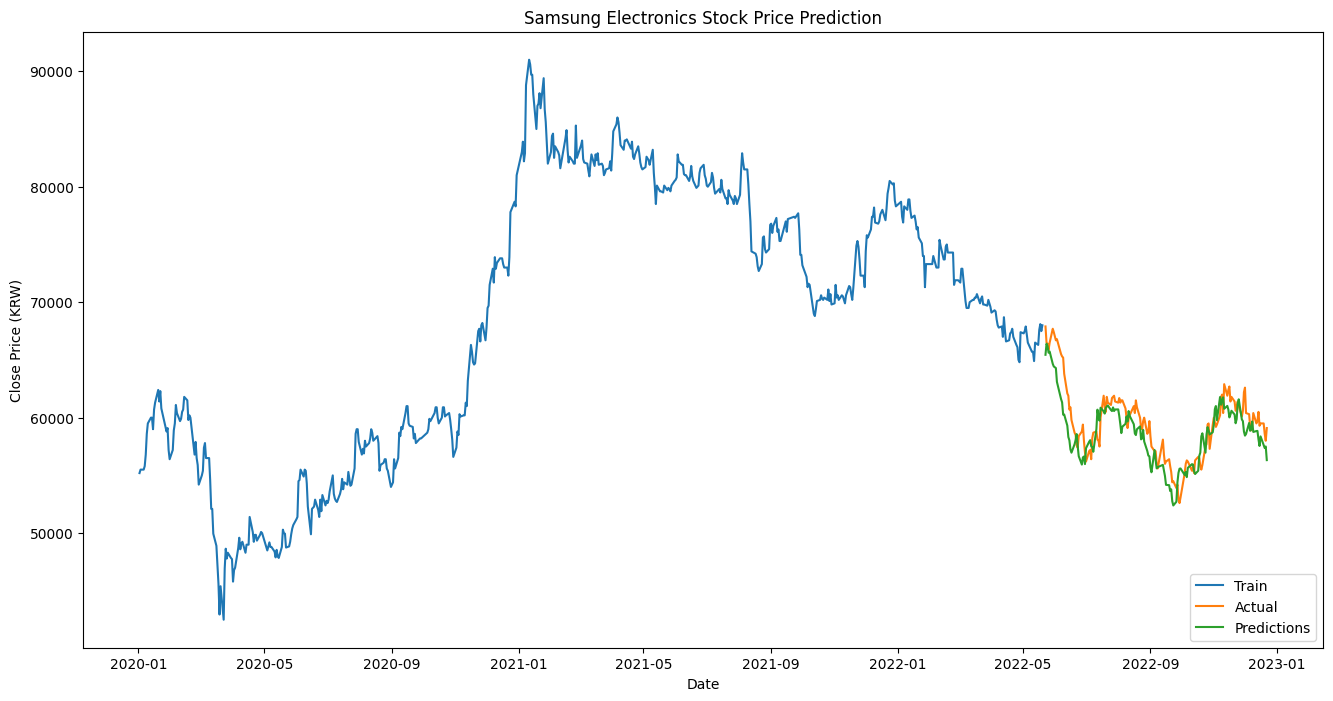

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 삼성전자 주가 데이터 가져오기 (yfinance 사용)
ticker = '005930.KS'  # 삼성전자 티커 (코스피 상장)
data = yf.download(ticker, start="2020-01-01", end="2023-01-01", actions=False)
data = data[['Close']]  # 종가 데이터만 사용


# 2. 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])

# 3. Self-supervised 학습 데이터 생성
# 과거 5일간의 종가를 입력으로, 다음 날 종가를 예측하는 방식
def create_dataset(dataset, look_back=5):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])  # look_back일의 종가 데이터를 입력으로 사용
        Y.append(dataset[i + look_back, 0])      # 다음 날의 종가를 출력으로 설정
    return np.array(X), np.array(Y)

look_back = 5
X, Y = create_dataset(scaled_data, look_back)

# 데이터 형태 변환 (LSTM 입력 형태에 맞게 3D 텐서로 변환)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# 4. 데이터셋 나누기 (훈련 80%, 테스트 20%)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

# 5. LSTM 모델 정의
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# 6. 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 7. 모델 학습
model.fit(X_train, Y_train, batch_size=1, epochs=10)

# 8. 모델 예측
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # 예측 값을 원래 스케일로 되돌림
Y_test = scaler.inverse_transform([Y_test])  # 실제 값도 스케일을 되돌림

# 9. 결과 시각화
train = data[:split]
valid = data[split:split + len(predictions)]  # 길이를 predictions에 맞추어 슬라이싱
valid['Predictions'] = predictions  # 예측 값을 추가

# 결과 시각화
plt.figure(figsize=(16, 8))
plt.title('Samsung Electronics Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (KRW)')
plt.plot(train['Close'], label="Train data")
plt.plot(valid[['Close', 'Predictions']], label="Validation and Predictions")
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
# 성능 평가
# 예측과 실제 값의 차이: 예측값과 실제값이 가까운지, 특히 중요한 변화 지점(상승/하락)에서 예측이 잘 맞는지를 확인합니다. 예측이 실제값과 밀접하게 일치하면 모델이 주가 패턴을 잘 학습한 것입니다.
# 변화 추세: 예측값이 실제값의 추세(상승, 하락)를 따라가는지 확인합니다. 모델이 상승 및 하락의 패턴을 제대로 학습했다면 예측이 유의미하다고 볼 수 있습니다.
# 오차 분석: 예측과 실제 간에 큰 차이가 있는 경우, 모델이 특정 패턴을 잘 학습하지 못한 것일 수 있습니다. 주가처럼 변동성이 큰 데이터를 예측하는 경우 완벽한 일치를 기대하기 어렵지만, 추세가 잘 맞으면 유의미한 예측 성능으로 판단할 수 있습니다.
# 개선 방안
# Look-back window: 모델에 입력으로 사용하는 과거 데이터 일수를 조정하여 최적의 look-back window를 찾을 수 있습니다.
# Epochs와 Batch Size: 학습 반복 횟수(Epochs)와 배치 크기(Batch Size)를 조정하여 학습 성능을 개선할 수 있습니다.
# 모델 구조 조정: LSTM 층 수나 뉴런 수를 조정하거나 GRU, Transformer 등 다른 모델을 시도해 볼 수 있습니다.

# CIFAR-10 데이터셋

In [ ]:
# 이미지에서 부분을 가려놓고 모델이 이 가려진 부분을 예측하도록 학습하는 방법을 구현해보겠습니다.
# 이 방법은 self-supervised 방식의 대표적인 예이며, BERT나 GPT와 같은 모델의 pretext task와 유사한 접근을 사용합니다.
# 여기서는 MNIST 데이터셋을 활용하여 간단한 self-supervised learning 예제를 구성해 보겠습니다. 이 예제에서는 각 이미지를 28x28 픽셀의 MNIST 숫자 이미지로 하고, 일부 픽셀을 가린 후 이를 예측하도록 학습합니다.

CIFAR-10 데이터셋은 10개의 일반적인 이미지 클래스로 구성된 소규모 이미지 데이터셋으로, 컴퓨터 비전과 딥러닝 모델을 실험하고 평가하는 데 자주 사용됩니다. CIFAR-10은 60,000개의 이미지로 이루어져 있으며, 각 이미지는 10개의 상호 배타적인 클래스로 분류됩니다.

CIFAR-10 데이터셋 특징
이미지 크기:
모든 이미지의 크기는 32x32 픽셀로, 작은 크기의 컬러 이미지로 구성되어 있습니다. 이는 큰 네트워크를 사용하지 않고도 빠르게 실험할 수 있게 해 줍니다.

채널:
RGB(컬러) 이미지를 포함하고 있어, 3채널 데이터로 각 픽셀은 Red, Green, Blue 값을 가집니다.

클래스 개수:
CIFAR-10 데이터셋에는 총 10개의 클래스가 있습니다. 각각의 클래스는 일반적인 사물과 동물로 구성되어 있습니다.
데이터 개수:
총 60,000개의 이미지가 있으며, 50,000개는 훈련용이고 10,000개는 테스트용으로 구성되어 있습니다.

레이블:
각 이미지는 0부터 9까지의 정수 레이블로 표현됩니다. 각 레이블은 특정 클래스를 나타냅니다.

CIFAR-10 클래스 목록
비행기 (airplane)
자동차 (automobile)
새 (bird)
고양이 (cat)
사슴 (deer)
개 (dog)
개구리 (frog)
말 (horse)
배 (ship)
트럭 (truck)

CIFAR-10의 용도와 활용:
기본적인 이미지 분류 문제를 학습하고 평가하기 위해 많이 사용됩니다.
모델 프로토타입 및 성능 검증에 적합하며, CNN, ResNet, VGG와 같은 모델의 성능을 비교하는 데도 자주 활용됩니다.
작은 크기 덕분에 간단한 컴퓨터 비전 프로젝트나 모델 아키텍처 실험을 빠르게 수행할 수 있습니다.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


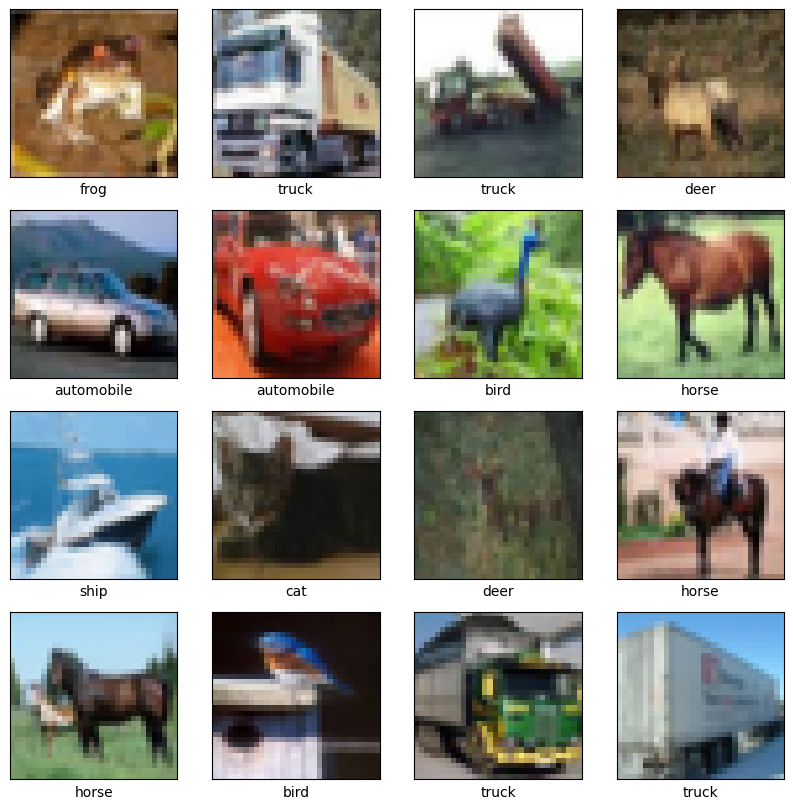

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# 데이터셋 불러오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터 구조 확인
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# 데이터 시각화
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


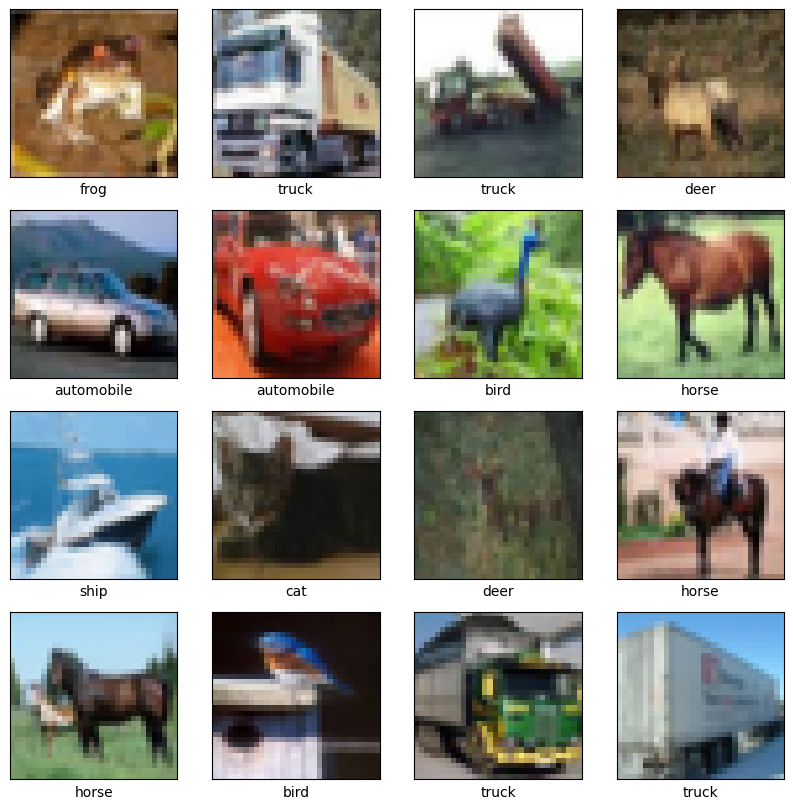

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 6117.3130
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 319.6735 
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.3792 
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.5493 
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.8012 
Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 3775.7544
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 269.6516  
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 81.9730  
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.5558 
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.1703 
Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5502.5483
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 180.8076  
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.7233 
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48.4513 
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.6303

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import random

# 데이터셋 불러오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터 구조 확인
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# 데이터 시각화
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Self-supervised 학습을 위한 데이터셋 생성 함수
def create_patched_data(img, patch_size=(16, 16)):
    patches = []
    for i in range(0, img.shape[0], patch_size[0]):
        for j in range(0, img.shape[1], patch_size[1]):
            patches.append(img[i:i+patch_size[0], j:j+patch_size[1]])
    original_order = list(range(len(patches)))
    random.shuffle(patches)  # 패치 순서를 섞기
    return np.array(patches), original_order

# 모델 정의 함수
def create_model(input_shape=(16, 16, 3)):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='linear')  # 원래 순서를 예측하는 레이어
    ])
    return model

# 모델 준비
models = [create_model() for _ in range(4)]  # 각 패치에 대해 별도 모델 (4개 패치 가정)

# 데이터 준비
def generate_training_data(x_data, num_patches=4):
    X, Y = [], []
    for img in x_data[:100]:  # 예시로 100개 샘플만 사용
        patches, original_order = create_patched_data(img)
        X.extend(patches)
        Y.extend(original_order)
    return np.array(X), np.array(Y)

# Self-supervised 학습 데이터 생성
X_train_patches, Y_train_order = generate_training_data(x_train)

# 모델 컴파일 및 학습
for model in models:
    model.compile(optimizer='adam', loss='mean_squared_error')

# 각 패치에 대한 모델 학습
for i, model in enumerate(models):
    model.fit(X_train_patches, Y_train_order, epochs=5, batch_size=32, verbose=1)
